1. For Problem 1 in Problem Set 3, pick one of the two boundary conditions, now assume non-steady-state conditions and plot an animation of the resulting changes in temperature profile. Provide some exact temperature measurements at several locations (you pick). Show/explain the code, the assumptions made, and the finite difference approach used.  

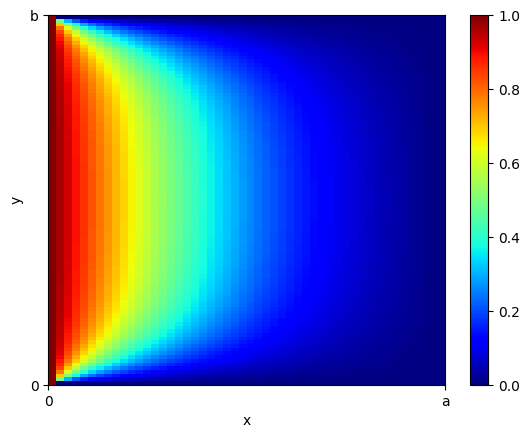

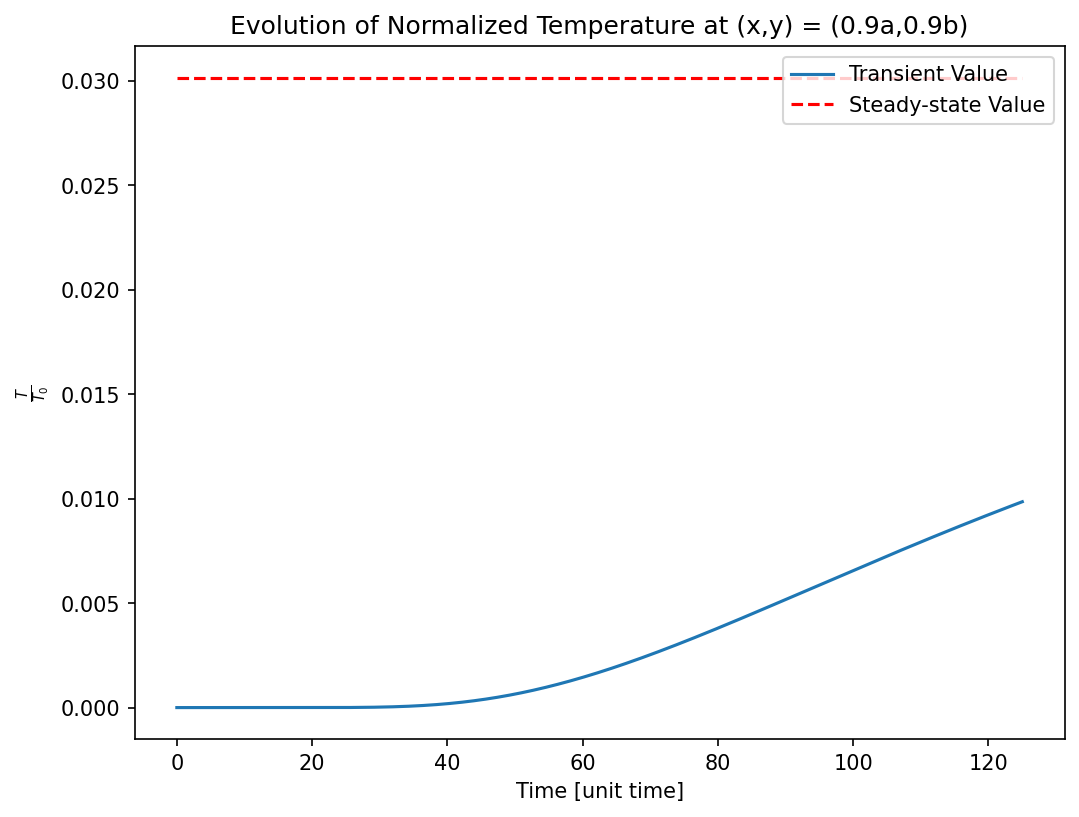

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

def calc_steady_state(q,r,s,num_terms):
    """
    

    Parameters
    ----------
    q : float
        value of y/b
    r : float
        value of x/a
    s : float
        value of a/b
    num_terms : int
        number of terms used to approximate the value of the Fourier series

    Returns
    -------
    float
        approximate value of the Fourier series

    """
    
    def term(n):
        term = (1 - (-1)**n)/n * np.sin(n * np.pi * q) * np.sinh(n * np.pi * (s-r*s)) / np.sinh(n * np.pi * s)
        return term
    
    term_sum = np.sum([term(i) for i in np.linspace(1,num_terms,num_terms)])
    approx = (2/np.pi) * term_sum
    return approx



plate_length = 50
max_iter_time = 1000

a = plate_length    # chosen arbitrarily
b = 2*a             # given

alpha = 2.0         # given
delta_x = 1         # given

# Calculated params
delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2) 

# Initialize solution: the grid of T(t, y, x) # y and x switched since prior example modeled a square instead of a rectangle
T = np.empty((max_iter_time, b, a))

# Initial condition everywhere inside the grid
T_initial = 0.0

# Boundary conditions (fixed temperature)
T_top = 0.0
T_left = 1.0    # normalized temperature to T_0 where maximum is 1
T_bottom = 0.0
T_right = 0.0

# Set the initial condition
T.fill(T_initial)

# Set the boundary conditions   # appropriated to the code
T[:, (b-1): , 1:]       = T_top
T[:, :      , :1]       = T_left
T[:, :1     , 1:]       = T_bottom
T[:, :      , (a-1):]   = T_right

# selecting a point to obtain temperature data from
x_loc = 45  # between 1 and a-2
y_loc = 90   # between 1 and b-2

def fdm(T):
    
  T_at_loc = [T[0][y_loc][x_loc]] # initialize a collecting array for values at specified location
    
  for t in range(0, max_iter_time-1, 1):
    for y in range(1, b-1, delta_x):
      for x in range(1, a-1, delta_x):
        T[t + 1, y, x] = gamma * (T[t][y+1][x] + T[t][y-1][x] + T[t][y][x+1] + T[t][y][x-1] - 4*T[t][y][x]) + T[t][y][x]
    
    T_at_loc.append(T[t,y_loc,x_loc]) # append calculated value for temeprature
    
  return T,T_at_loc # added vector of temperatures at specified location as output

def plotheatmap(T, k):
  # Clear the current plot figure
  
  plt.clf()
#   plt.title(r"$\frac{T}{T_0}$" f" at t = {k*delta_t:.3f} unit time")
  plt.xlabel("x")
  plt.xticks([0, 50], ["0", "a"])   # changed ticks to only be "0" at 0 and "a" at maximum x value
  plt.ylabel("y")
  plt.yticks([0, 100], ["0", "b"])  # changed ticks to only be "0" at 0 and "b" at maximum y value
  
  # This is to plot u_k (u at time-step k)
  plt.pcolormesh(T, cmap=plt.cm.jet, vmin=0, vmax=1)    # changed color bar range from 0 to 1
  plt.colorbar()
  
  return plt

T, T_loc = fdm(T)
T_loc = np.array(T_loc) # obtains temeperature at specific location 
k = 998
plotheatmap(T[k], k)
plt.show()


# plot normalized temperature over time
time_range = np.linspace(0, delta_t*max_iter_time, max_iter_time)

steady_state_value = calc_steady_state(y_loc/b, x_loc/a, a/b, 15) # obtain steady-state value from a function defined in MEM611_Class.py

plt.figure(figsize=(8,6),dpi=150)
plt.plot(time_range,T_loc, label='Transient Value')
plt.hlines(steady_state_value, time_range[0], time_range[-1], color='red', linestyles='--', label='Steady-state Value')
plt.xlabel(r"Time [unit time]")
plt.ylabel(r"$\frac{T}{T_0}$")
plt.title(f"Evolution of Normalized Temperature at (x,y) = ({x_loc/a}a,{y_loc/b}b)")
plt.legend()


# animation of temperature profile evolution over time

def animate(k):
    plotheatmap(T[k], k)

    interval = 1 #time in milliseconds between frames 
    anim = animation.FuncAnimation(plt.figure(figsize=(5,9),dpi=100), animate, interval=interval, frames=max_iter_time, repeat=False)
    anim.save("heat_equation_solution.gif", fps=30)






2. For the following rectangular cross-section at steady-state, find the temperature profile by first determining the appropriate characteristic value problem. 

First, we have to understand that the problem by itself is not immediately solvable via separation of variables because there are two inhomogeneous boundary conditions. We can make one of them homogeneous by using a change of variable, say: $\theta(x,y)\ =\ T(x,y)\ -\ T_1$

The resulting boundary conditions are: $\frac{\partial \theta(0,y)}{\partial x}\ =\ 0$, $\theta (a,y)\ =\ 0$, $\theta (x,b)\ =\ T_2\ -\ T_1\ =\ \theta _0$, $\frac{\partial \theta (x,0)}{\partial y}\ =\ 0$

Now, we can use separation of variables. Note that we have boundary conditions of the second kind due to the differentials. 

For X: $\frac{d^2 X}{dx^2}\ +\ \lambda ^2 X\ =\ 0$ with boundary conditions $\frac{dX(0)}{dx}\ =\ 0$, $X(a)\ =\ 0$ 

The solution is: $X_n(x)\ =\ A_n cos(\lambda _n x),\ \lambda _n\ =\ \frac{2n\ +\ 1}{a}\frac{\pi}{2}, n\ =\ 0,1,2,...$

For Y: $\frac{d^2Y_n}{dy^2}\ -\ \lambda _n^2 Y_n\ =\ 0$ and $\frac{dY_n(0)}{dy}\ =\ 0$

$Y_n(y)\ =\ B_n cosh(\lambda _n y)$

Thus, $\theta (x,y)\ =\ \sum _{n=0}^\infty a_n cos(\lambda _n x) cosh(\lambda _n y)$

Using the boundary condition at y = b:
$\theta _0\ =\ \sum _{n=0}^\infty a_n cosh(\lambda _n b) cos(\lambda _n x)$

to solve for $a_n$, multiply both sides by $cos(\lambda _m x)$ and integrate from 0 to a. Due to cosine orthogonality, all terms on the right vanish except when n = m. 

$\int _0^a \theta _0 cos(\lambda _m x) dx\ =\ a_m cosh(\lambda _m b) \int _0^a cos^2 (\lambda _m x) dx$

$a_n\ =\ \frac{\theta _0}{cosh(\lambda _n b)} \frac{\int _0^a cos(\lambda _n x)dx}{\int _0^a cos^2(\lambda _n x)dx}$

3. A slab of thickness L is initially at $T_i$. For t > 0 the temperature of the surface at x = L is maintained at $T_w$, whereas the other side at x = 0 is kept insulated (i.e. no temperature gradient). Determine the unsteady temperature profile T(x,t) by using boundary conditions that enable use of separation of variables. 

Use a change of variable to enable use of separation of variables: $\theta (x,t)\ =\ T(x,t)\ -\ T_w$

$\frac{\partial ^2 \theta}{\partial x^2}\ =\ \frac{1}{\alpha} \frac{\partial \theta}{\partial t}$

with boundary conditions $\theta (x,0)\ =\ T_i\ -\ T_w$, $\frac{\partial \theta (0,t)}{\partial x}\ =\ 0$, $\theta (L,t)\ =\ 0$

Let $\theta (x,t)\ =\ X(x)*\Gamma (t)$

For X: $\frac{d^2 X}{dx^2}\ +\ \lambda ^2 X\ =\ 0, \frac{dX(0)}{dx}\ =\ 0, X(L)\ =\ 0$

$X_n(x)\ =\ A_n cos(\lambda _n x)$ where $\lambda _n\ =\ \frac{(2n-1)\pi}{2L},\ n\ =\ 1,2,3,...$ 

For $\Gamma$: $\frac{d\Gamma _n}{dt}\ +\ \alpha \lambda _n^2 \Gamma _n\ =\ 0$

$\Gamma _n (t)\ =\ B_n e^{-\alpha \lambda _n^2 t}$

Therefore, 

$\theta (x,t)\ =\ \sum _{n=1}^{\infty} a_n e^{\alpha \lambda _n^2 t} cos(\lambda _n x)$


Plugging in the initial condition:

$T_i\ -\ T_w\ =\ \sum_{n=1}^{\infty} a_n cos(\lambda _n x)$

$a_n\ =\ 2/L (T_i\ -\ T_w) \int _0^L cos(\lambda _n x) dx\ =\ 2(T_i\ -\ T_w)/L sin(\lambda _n x)/\lambda _n |_0^L\ =\ \frac{4(T_i\ -\ T_w)(-1)^{n+1}}{(2n-1)\pi}$

$\frac{T\ -\ T_w}{T_i\ -\ T_w}\ =\ \frac{4}{\pi} \sum _{n=1}^{\infty} \frac{(-1)^{n+1}}{2n-1} e^{-\alpha \lambda _n^2 t}cos(\lambda _n x)$

